In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
! pip install pandas numpy scikit-learn xgboost lightgbm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings globally
from sklearn.model_selection import cross_val_score

In [4]:
test_df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv')

In [5]:
train_df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv')

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# Impute missing values for Age and Embarked
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mode()[0], inplace=True)


In [29]:
# Drop unnecessary columns if they exist
columns_to_drop = ['Name', 'Ticket', 'Cabin']
train_df.drop(columns=[col for col in columns_to_drop if col in train_df.columns], inplace=True)
test_df.drop(columns=[col for col in columns_to_drop if col in test_df.columns], inplace=True)

In [30]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [31]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.162929,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.046587,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [33]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [35]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [36]:
# Correlation matrix
corr = train_df.corr()


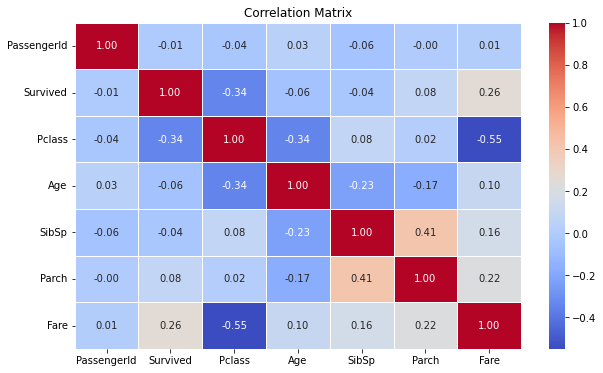

In [37]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [38]:

# Create a scatterplot for Survived vs Age
plt.figure(figsize=(12, 6))


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Survived vs Age')

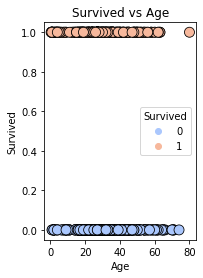

In [39]:
# Scatterplot for Survived vs Age
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Survived', data=train_df, hue='Survived', palette='coolwarm', s=100, edgecolor='black')
plt.title('Survived vs Age')


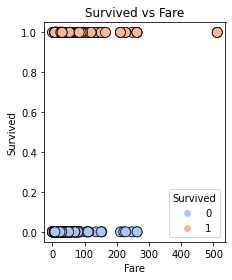

In [40]:

# Scatterplot for Survived vs Fare
plt.subplot(1, 2, 2)
sns.scatterplot(x='Fare', y='Survived', data=train_df, hue='Survived', palette='coolwarm', s=100, edgecolor='black')
plt.title('Survived vs Fare')

plt.tight_layout()
plt.show()

In [54]:

# Encode categorical variables
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])


In [75]:

# Define features and target
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']


In [56]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [66]:
# Train XGBClassifier
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [60]:
# Predict
xgb_preds = xgb_model.predict(X_test)


In [61]:
# Evaluate
print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

XGBoost Classifier:
Accuracy: 0.7486033519553073
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       110
           1       0.69      0.62      0.66        69

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179

ROC-AUC: 0.7703557312252965


In [71]:
# Train LGBMClassifier with suppressed warnings
lgb_model = LGBMClassifier(
    random_state=42,
    verbose=-1,  # Suppress all logs
    logging_level='error',  # Display only errors
    max_depth=10,  # Ensure deeper trees
    num_leaves=31  # Allow more leaves
)
lgb_model.fit(X_train, y_train)


LGBMClassifier(logging_level='error', max_depth=10, random_state=42, verbose=-1)

In [72]:

# Predict
lgb_preds = lgb_model.predict(X_test)


In [73]:

# Evaluate
print("\nLightGBM Classifier:")
print("Accuracy:", accuracy_score(y_test, lgb_preds))
print("Classification Report:\n", classification_report(y_test, lgb_preds))
print("ROC-AUC:", roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1]))



LightGBM Classifier:
Accuracy: 0.7597765363128491
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       110
           1       0.71      0.64      0.67        69

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179

ROC-AUC: 0.7880105401844533


In [80]:

# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-validation Accuracy Scores:", xgb_cv_scores)
print("XGBoost Mean Accuracy:", np.mean(xgb_cv_scores))
print("XGBoost Standard Deviation of Accuracy:", np.std(xgb_cv_scores))


XGBoost Cross-validation Accuracy Scores: [0.77622378 0.79020979 0.81690141 0.83802817 0.81690141]
XGBoost Mean Accuracy: 0.8076529104698119
XGBoost Standard Deviation of Accuracy: 0.021843894731926605


In [81]:
# Perform cross-validation
lgb_cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nLightGBM Cross-validation Accuracy Scores:", lgb_cv_scores)
print("LightGBM Mean Accuracy:", np.mean(lgb_cv_scores))
print("LightGBM Standard Deviation of Accuracy:", np.std(lgb_cv_scores))



LightGBM Cross-validation Accuracy Scores: [0.79020979 0.78321678 0.83802817 0.83802817 0.83098592]
LightGBM Mean Accuracy: 0.81609376538954
LightGBM Standard Deviation of Accuracy: 0.024227622199981806


In [ ]:
findings :- XGBoost:
            Mean Accuracy: 0.808
            Standard Deviation: 0.022
The mean accuracy of 0.808 is decent, and the standard deviation indicates that the model's performance is relatively stable across the folds.

            LightGBM:
            Mean Accuracy: 0.816
            Standard Deviation: 0.024
LightGBM has a slightly higher mean accuracy (0.816), suggesting it performs better on average than XGBoost. The standard deviation is similar to XGBoost, indicating relatively stable performance.
   